In [1]:
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [2]:
from experiments import run_experiments

## The Data
### Log-Normal Distribution
In order to simulate an annoying real-world distribution, I used the log-normal distribution and rounded the results

This causes a large number of uniques, but with heavy-hitters and several lower probability uniques that still show up several times

### Sample Random Seed
To generate the same sample on several runs, I just used my id as the random seed.

### Sample size
I choose to use a million (1e6) samples, since it's a nice round number.


In [3]:
X = lognorm.rvs(5, size=int(1e6), random_state=206783441).astype(int)

### Number of unique values
With the chosen seed I got 37418 unique values - which is matches the criteria

In [4]:
np.unique(X).shape

(37418,)

### How the distributions looks
We can see what I mean - many heavy hitters close to 0, but plenty of uniques

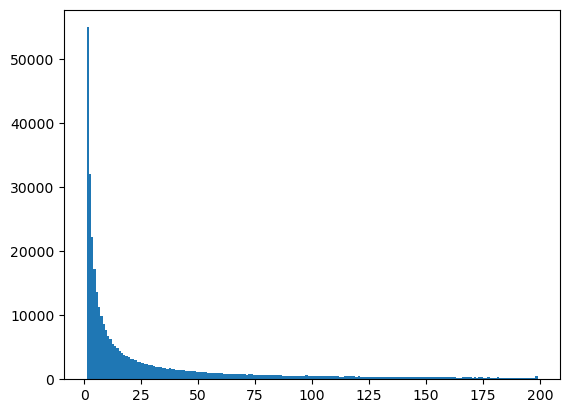

In [5]:
plt.hist(X, bins=np.arange(1, 200))
plt.show()

## Experiments
### Parameters
I ran 100 different experiments for each estimator and config, with the seeds being the values 1 to 100 for each one.

I used the seed to init the random hash function (the way it works is further elaborated in the file `experiments.py`) and besides that everthing else is deterministic

### Single $\alpha$ estimator
Here I ran a full FM estimator with a single hash function and a single $\beta$ estimator - which is just an $\alpha$ estimator

In [6]:
results = run_experiments(X, base_seeds=np.arange(1, 101).tolist(), num_hashes=1, num_betas=1)

100%|██████████| 100/100 [01:02<00:00,  1.60it/s]


In [7]:
np.median(results)

np.float64(80108.46486556508)

In [8]:
np.mean(results)

np.float64(230814.6418128495)

In [9]:
np.var(results) / len(np.unique(X))

np.float64(2905653.7022580504)

In [16]:
fig = go.Figure(data=go.Histogram(x=results, nbinsx=60, showlegend=False))
fig.add_vline(x=len(np.unique(X)), line_dash="dash", line_color="red", name=f'actual number of uniques ({len(np.unique(X))})', showlegend=True)
fig.show()

In [21]:
fig = go.Figure(data=go.Box(x=results, showlegend=False))
fig.add_vline(x=len(np.unique(X)), line_dash="dash", line_color="red", name=f'actual number of uniques ({len(np.unique(X))})', showlegend=True)
fig.show()

In [22]:
fig = go.Figure(data=go.Violin(x=results, showlegend=False))
fig.add_vline(x=len(np.unique(X)), line_dash="dash", line_color="red", name=f'actual number of uniques ({len(np.unique(X))})', showlegend=True)
fig.show()

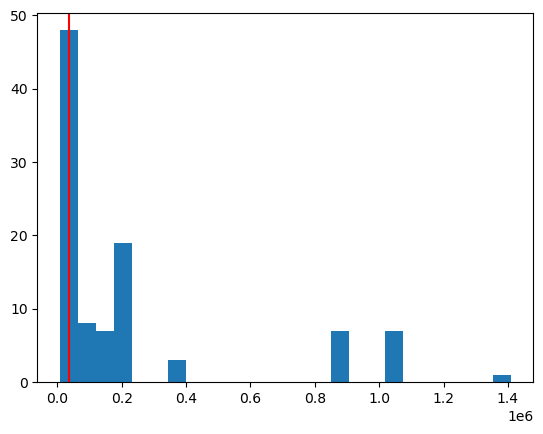

In [11]:
plt.hist(results, bins=25)
plt.axvline(x=len(np.unique(X)), color='r')
plt.show()

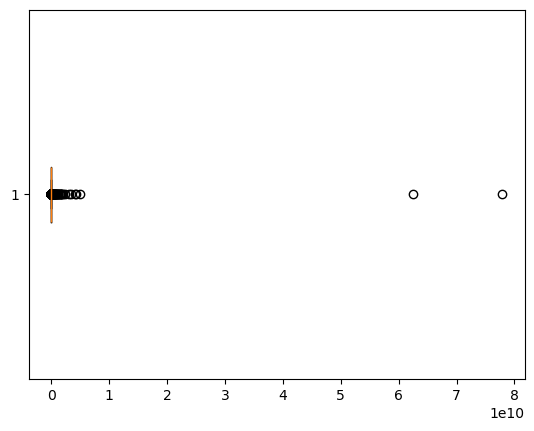

In [12]:
plt.boxplot(X, orientation='horizontal', bootstrap=20)
plt.show()